# ml-demo1

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-demo1")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yash-kavaiya/ml-demo1" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/yash-kavaiya/ml-demo1


'https://jovian.ai/yash-kavaiya/ml-demo1'

In [4]:
medical = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [5]:
from urllib.request import urlretrieve

In [6]:
urlretrieve(medical,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7fa559837cd0>)

In [7]:
import pandas as pd
medical_df =pd.read_csv('medical.csv')

In [9]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
!pip install plotly seaborn matplotlib

     |████████████████████████████████| 19.1 MB 1.4 MB/s eta 0:00:01


In [13]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize']=(12,6)

In [16]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

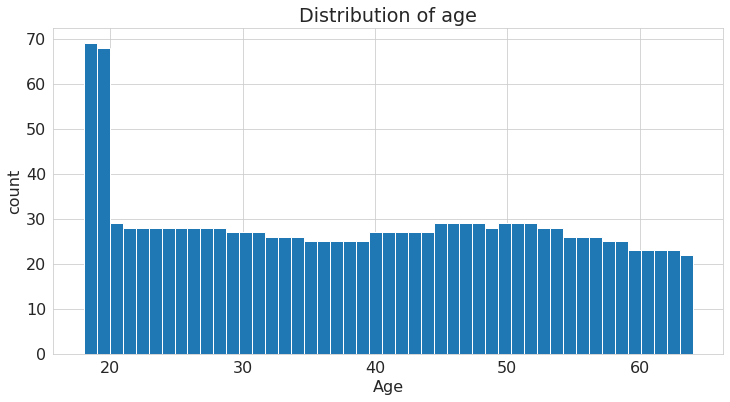

In [33]:

plt.ylabel("count")
plt.xlabel('Age')
plt.title("Distribution of age")
plt.hist(medical_df.age,bins=47);


In [34]:
fig = px.histogram(medical_df,x='age',nbins=47,title='Distribution of age',marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
fig = px.histogram(medical_df,x='bmi',nbins=47,title='Distribution of BMI',marginal='box',color_discrete_sequence=['red'])
fig.update_layout(bargap=0.1)
fig.show()

In [36]:
fig = px.histogram(medical_df,x='charges',color='smoker',nbins=47,title='Distribution of BMI',marginal='box',color_discrete_sequence=['red','green'])
fig.update_layout(bargap=0.1)
fig.show()

In [37]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [38]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [27]:
px.scatter(medical_df,x='age',y='charges',color='smoker',title='Age v Charges')

In [29]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [30]:
medical_df.charges.corr(medical_df.age)

0.2990081933306479

In [32]:
medical_df.charges.corr(medical_df.bmi)

0.198340968833629

In [38]:
smoker_value ={'no':0,'yes':1}
sn= medical_df.smoker.map(smoker_value)
sn

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [39]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

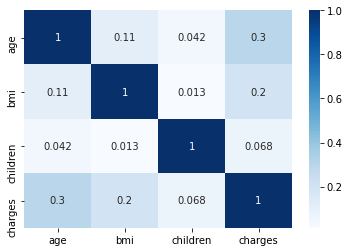

In [46]:
sns.heatmap(medical_df.corr(),cmap='Blues',annot=True)

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "yash-kavaiya/ml-demo1" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/yash-kavaiya/ml-demo1


'https://jovian.ai/yash-kavaiya/ml-demo1'

In [53]:
non_smoker_df =medical_df.smoker[medical_df.smoker=="no"]

ValueError: Could not interpret value `age` for parameter `x`

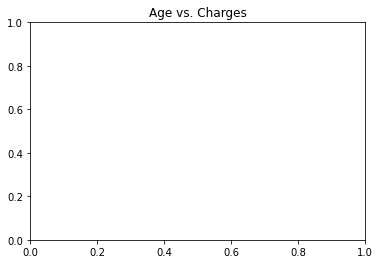

In [57]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [56]:
medical_df.age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64